# Jupyter Notebook for Demo

In [18]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

## Smartphone Performance Degradation (No repairing)

In [28]:
def degrade_performance(time_held, performance=1.0, decay_rate=0.00025):
    """
    Simulate the degradation of performance over time using an exponential decay model with Gaussian noise.
    """
    # Calculate the exponential decay
    decay_factor = math.exp(-decay_rate * time_held)
    performance = max(0, performance * decay_factor)
    # Add Gaussian noise to the performance
    noise = random.gauss(0, decay_rate)  # Mean of 0, standard deviation of 0.02
    performance = max(0, min(1, performance + noise))  # Ensure performance stays between 0 and 1
    # Update the status if the phone reaches a critical performance level or by random chance
    return performance

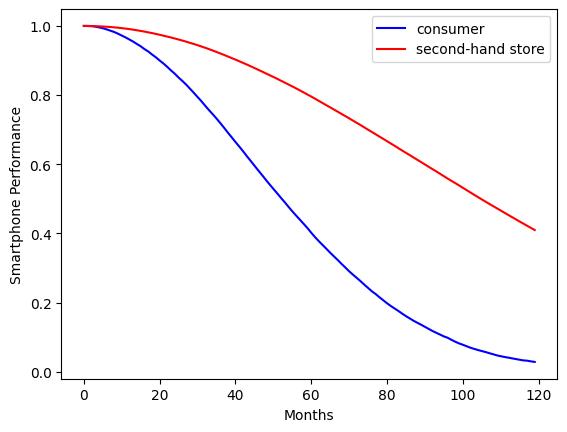

In [33]:
performance_con = 1.0
performance_sec = 1.0
months = 120
degraded_perf_con = [performance_con]
degraded_perf_sec = [performance_con]
for t in range(1, months):
    performance_con = degrade_performance(t, performance_con, decay_rate=0.0005)
    degraded_perf_con.append(performance_con)
    performance_sec = degrade_performance(t, performance_sec, decay_rate=0.0005/4)
    degraded_perf_sec.append(performance_sec)

plt.plot(degraded_perf_con, 'b-', label='consumer')
plt.plot(degraded_perf_sec, 'r-', label='second-hand store')
plt.ylabel('Smartphone Performance')
plt.xlabel('Months')
plt.legend()
plt.show()

## Smartphone Repairing function

In [21]:
def repair_product(repair_times, performance, time_held):
    """
    Attempt to repair the phone, with repair effectiveness influenced by time held and repair times.
    The more time held and repairs done, the less effective each repair becomes.
    """
    # Calculate repair effectiveness: The older the phone and the more repairs done, 
    # the less effective the repair is
    repair_effectiveness = max(0.1, 1 - (repair_times * 0.05) - (time_held * 0.001))
    # Random factor to simulate repair success (between 0 and 1)
    repair_success = random.random()
    # Repair success is influenced by repair effectiveness
    if repair_success < repair_effectiveness:
        # Each repair increases performance by a factor, but it's limited by the maximum performance
        performance_increase = 0.2 * (1 - performance)  # The closer to 1, the smaller the increase
        performance = min(1.0, performance + performance_increase)
    # Log the repair attempt
    return performance

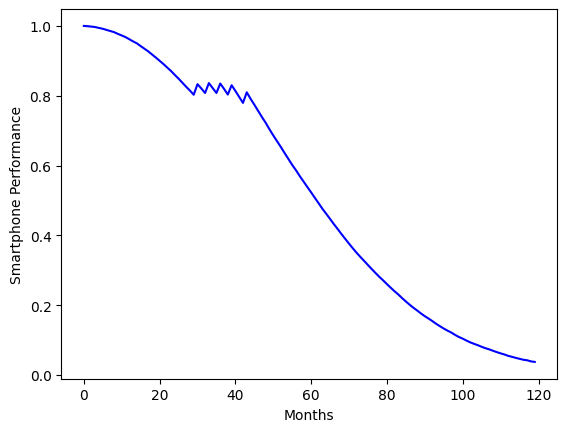

In [25]:
performance_con = 1.0
repair_times = 0
months = 120
degraded_perf_con = [performance_con]
for t in range(1, months):
    performance_con = degrade_performance(t, performance_con)
    if 0.3 <= performance_con <= 0.8 and repair_times <= 6 :
        performance_con = repair_product(repair_times, performance_con, time_held=t)
        degraded_perf_con.append(performance_con)
        repair_times += 1
    else:
        degraded_perf_con.append(performance_con)

# print(degraded_perf)
plt.plot(degraded_perf_con, 'b-')
plt.ylabel('Smartphone Performance')
plt.xlabel('Months')
plt.show()